In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [119]:
print(tf.__version__)

2.7.0-dev20210706


In [2]:
# read data

# dataset
## import datetime
dt = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\datetime.csv', delimiter=';')
#Time

## import variables
df = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_ffill.csv', delimiter=';')
df = df.drop(['Unnamed: 0'], axis=1)

df.head()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,C1a,C1b,C2a,C2b,water_flow_c2,water_flow_c1,exp_valve_c1,exp_valve_c2,superheat_c1,superheat_c2
0,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,42.2000,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,12.000000,12.022222
1,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,42.2000,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,12.055556,11.988889
2,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,42.2125,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,11.962500,12.000000
3,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,42.2300,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,30.9,11.990000,12.000000
4,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,42.2000,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,12.075000,12.037500


In [3]:
dataset = pd.concat([dt,df], axis = 1)
dataset.head()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,C1a,C1b,C2a,C2b,water_flow_c2,water_flow_c1,exp_valve_c1,exp_valve_c2,superheat_c1,superheat_c2
0,2020-01-01 00:00:00,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,12.000000,12.022222
1,2020-01-01 00:01:00,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,12.055556,11.988889
2,2020-01-01 00:02:00,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,11.962500,12.000000
3,2020-01-01 00:03:00,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,30.9,11.990000,12.000000
4,2020-01-01 00:04:00,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,...,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0,12.075000,12.037500


In [4]:
# drop  superheat_c1 and 2
titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'superheat_c1', 'superheat_c2']
selected_titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2']

df = df[selected_titles][:527041]
dt = dt[:527041]

dataset = pd.concat([dt,df], axis = 1)
dataset.head()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,temperature_c2.3,temperature_c2.4,C1a,C1b,C2a,C2b,water_flow_c2,water_flow_c1,exp_valve_c1,exp_valve_c2
0,2020-01-01 00:00:00,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,...,14.444444,7.6,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0
1,2020-01-01 00:01:00,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,...,14.577778,7.6,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0
2,2020-01-01 00:02:00,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,...,14.537500,7.6,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0
3,2020-01-01 00:03:00,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,...,14.520000,7.6,1.0,0.0,0.0,1.0,50.0,40.0,32.0,30.9
4,2020-01-01 00:04:00,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,...,14.425000,7.6,1.0,0.0,0.0,1.0,50.0,40.0,32.0,31.0


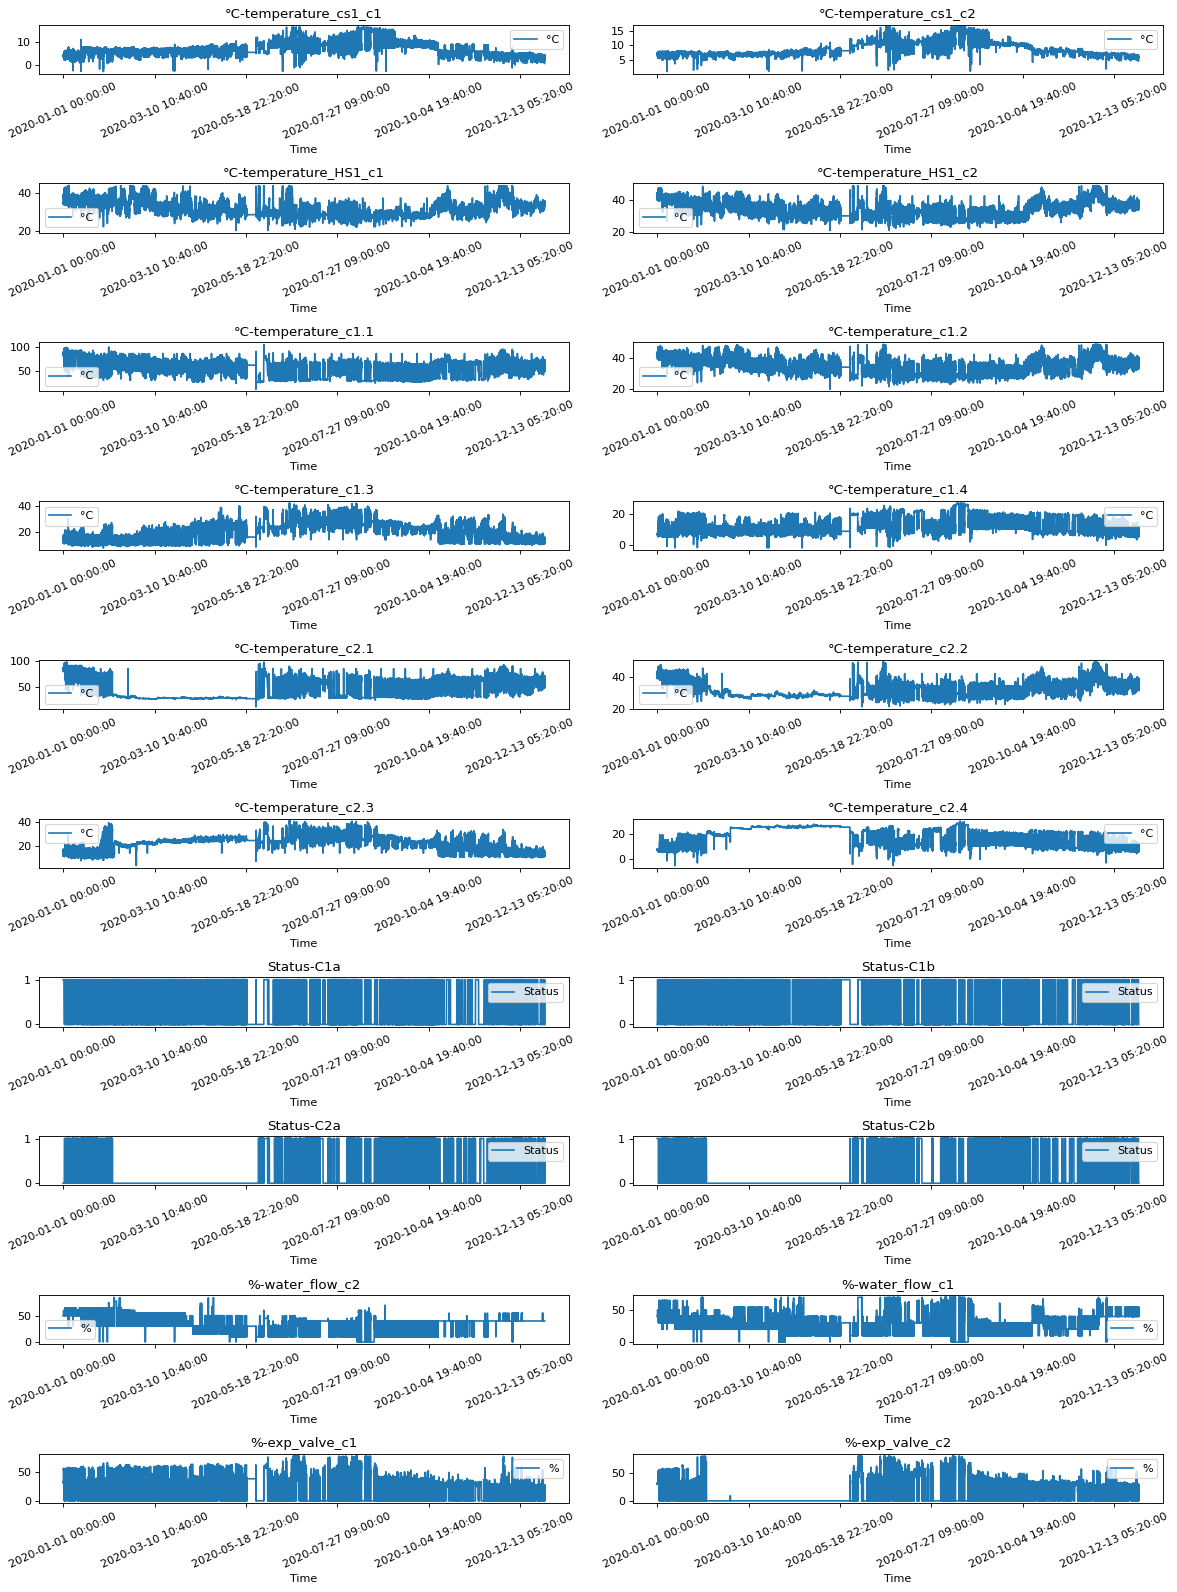

In [123]:
feature_keys = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3',	'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3',	'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2']#, 'superheat_c1', 'superheat_c2']

title = ['°C','°C','°C','°C','°C','°C','°C','°C','°C','°C','°C','°C', 'Status', 'Status', 'Status', 'Status', '%', '%', '%', '%']#, 'K', 'K']

date_time = 'Time'

def visualization(data):
    time_data = data[date_time]
    fig, axes = plt.subplots(
        nrows=10, ncols=2, figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax = axes[i//2,i%2],
            title ='{}-{}'.format(title[i], key),
            rot = 25,
        )
        ax.legend([title[i]])
    plt.tight_layout()

visualization(dataset)

In [5]:
df =df[['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3',	'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3',	'temperature_c2.4', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2']]

df.head()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,temperature_c2.3,temperature_c2.4,water_flow_c2,water_flow_c1,exp_valve_c1,exp_valve_c2
0,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,42.2000,14.444444,7.6,50.0,40.0,32.0,31.0
1,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,42.2000,14.577778,7.6,50.0,40.0,32.0,31.0
2,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,42.2125,14.537500,7.6,50.0,40.0,32.0,31.0
3,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,42.2300,14.520000,7.6,50.0,40.0,32.0,30.9
4,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,42.2000,14.425000,7.6,50.0,40.0,32.0,31.0


In [6]:
# normalize data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_norm = scaler.fit_transform(df)

In [7]:
# split data 70%, 20%, 10%

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [127]:
## normalize data

#train_mean = train_df.mean()
#train_std = train_df.std()

#train_df = (train_df - train_mean) / train_std
#val_df = (val_df - train_mean) / train_std
#test_df = (test_df - train_mean) / train_std

In [128]:
#df_std = (df - train_mean) / train_std
#df_std = df_std.melt(var_name='Column', value_name='Normalized')
#plt.figure(figsize=(12, 6))
#ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
#_ = ax.set_xticklabels(df.keys(), rotation=90)

In [129]:
# An important constructor argument for all Keras RNN layers, such as tf.keras.layers.LSTM, is the return_sequences argument


In [8]:
# data window

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [9]:
# input window of 720 - every half day
w1 = WindowGenerator(input_width=720, label_width=1, shift=720,
                     label_columns=['temperature_c1.1'])
w1

Total window size: 1440
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

In [10]:
# split
## Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window


In [11]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 1440, 16)
Inputs shape: (3, 720, 16)
Labels shape: (3, 1, 1)


In [12]:
w1.example = example_inputs, example_labels

In [13]:
def plot(self, model=None, plot_col='temperature_c1.1', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [min]')

WindowGenerator.plot = plot

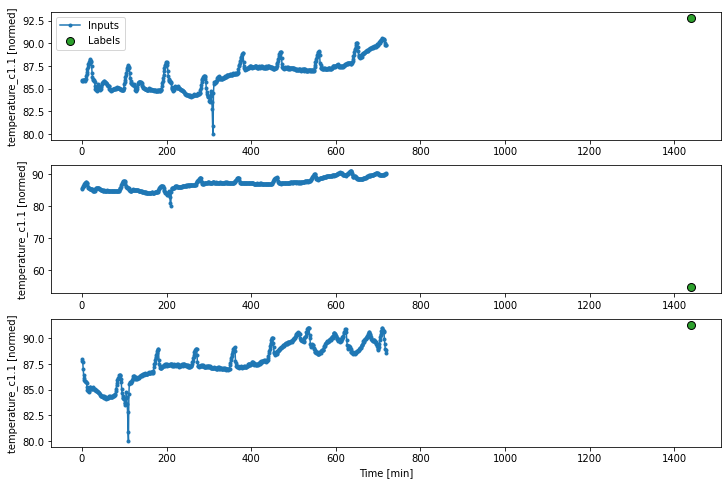

In [136]:
w1.plot()

In [14]:
# Create tf.data.Datasets
## Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the preprocessing.timeseries_dataset_from_array function:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [15]:
# The WindowGenerator object holds training, validation, and test data.
##Add properties for accessing them as tf.data.Datasets using the make_dataset method you defined earlier. Also, add a standard example batch for easy access and plotting:
@property
def train(self):
  return self.make_dataset(self.train_df)
  
@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 720, 16), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [17]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 720, 16)
Labels shape (batch, time, features): (32, 1, 1)


In [18]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temperature_c1.1'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['temperature_c1.1']

In [19]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 16)
Labels shape (batch, time, features): (32, 1, 1)


In [20]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [21]:
# Instantiate and evaluate this model:

baseline = Baseline(label_index=column_indices['temperature_c1.1'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

# ps.: That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

3294/3294 [==============================] - 3s 899us/step - loss: 3.0957 - mean_absolute_error: 0.5448


In [22]:
# create a wider WindowGenerator that generates windows 24 hours of consecutive inputs and labels at a time. 
# The new wide_window variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the time axis acts like the batch axis: each prediction is made independently with no interaction between time steps:

wide_window = WindowGenerator(
    input_width=60, label_width=60, shift=1,
    label_columns=['temperature_c1.1'])
    
wide_window

Total window size: 61
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Label column name(s): ['temperature_c1.1']

In [23]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 60, 16)
Output shape: (32, 60, 1)


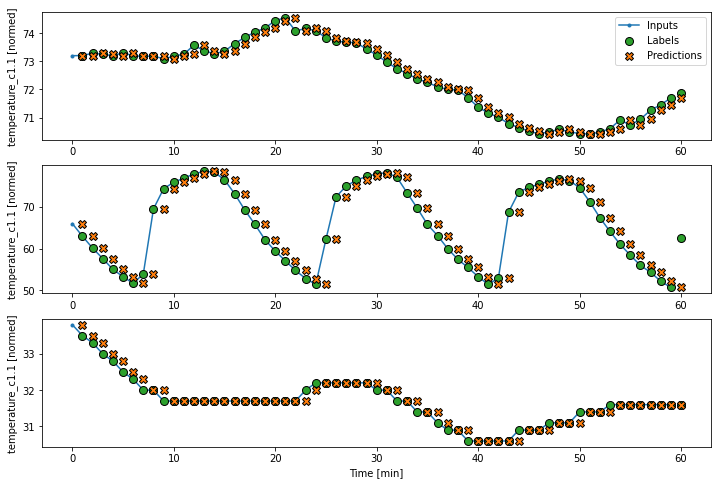

In [147]:
wide_window.plot(baseline)

The blue Inputs line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.

The green Labels dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.

The orange Predictions crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the Labels.

In [24]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=5):
  reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
                  
  #reduce = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
  #                                                  patience=patience,
  #                                                  mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[reduce])
  return history

In [25]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1) # 1 output
])

In [26]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 60, 16)
Output shape: (32, 60, 1)


In [27]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (32, 60, 32)              6272      
_________________________________________________________________
dense (Dense)                (32, 60, 1)               33        
Total params: 6,305
Trainable params: 6,305
Non-trainable params: 0
_________________________________________________________________


In [151]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
11528/11528 [==============================] - 183s 16ms/step - loss: 232.3747 - mean_absolute_error: 7.0141 - val_loss: 1.2943 - val_mean_absolute_error: 0.6042
Epoch 2/50
11528/11528 [==============================] - 179s 16ms/step - loss: 0.6838 - mean_absolute_error: 0.4003 - val_loss: 1.0392 - val_mean_absolute_error: 0.4366
Epoch 3/50
11528/11528 [==============================] - 178s 15ms/step - loss: 0.4632 - mean_absolute_error: 0.3291 - val_loss: 1.0112 - val_mean_absolute_error: 0.4135
Epoch 4/50
11528/11528 [==============================] - 179s 16ms/step - loss: 0.4118 - mean_absolute_error: 0.3069 - val_loss: 0.7416 - val_mean_absolute_error: 0.3579
Epoch 5/50
11528/11528 [==============================] - 181s 16ms/step - loss: 0.3820 - mean_absolute_error: 0.2959 - val_loss: 0.6430 - val_mean_absolute_error: 0.3123
Epoch 6/50
11528/11528 [==============================] - 179s 16ms/step - loss: 0.3603 - mean_absolute_error: 0.2880 - val_loss: 0.5709 - val_

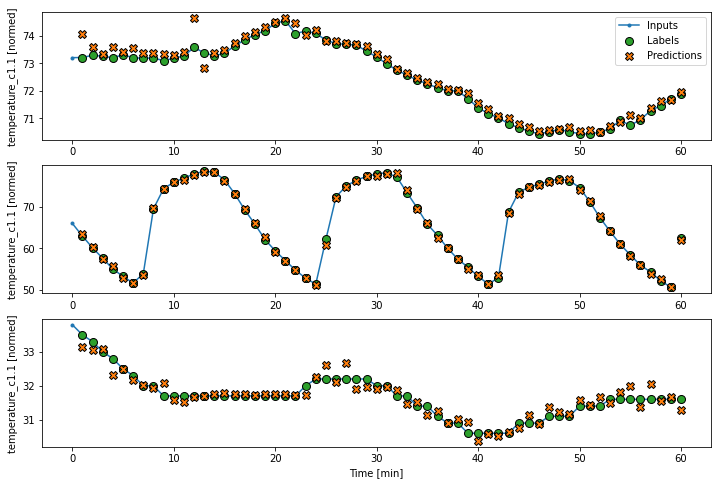

In [152]:
wide_window.plot(lstm_model)

In [153]:
#plt.plot(lstm_model)

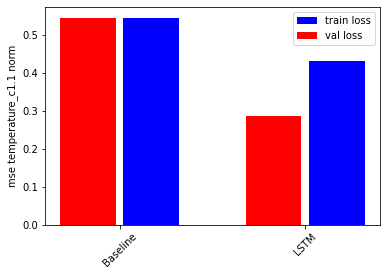

In [154]:
# performance

x = np.arange(len(performance)) 
#x = np.arange(len(performance))
width = 0.3
metric_name = 'mse'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
test_mae = [v[metric_index] for v in performance.values()]
val_mae = [v[metric_index] for v in val_performance.values()]

plt.ylabel('mse temperature_c1.1 norm')
plt.bar(x + 0.17, test_mae, width, color = 'blue', label='train loss')
plt.bar(x - 0.17, val_mae, width, color = 'red', label='val loss')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [155]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5464
LSTM        : 0.4313


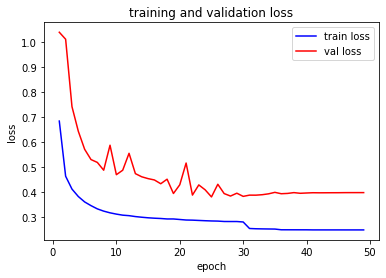

final val loss:  [1.2942970991134644, 1.0392158031463623, 1.0112366676330566, 0.7416104078292847, 0.6430492401123047, 0.570891261100769, 0.5298957228660583, 0.5184712409973145, 0.4873098134994507, 0.587232232093811, 0.46936890482902527, 0.48717746138572693, 0.5548841953277588, 0.47354522347450256, 0.46095728874206543, 0.453645795583725, 0.4482419192790985, 0.43313413858413696, 0.4513036906719208, 0.39407989382743835, 0.42902615666389465, 0.5159660577774048, 0.3877759277820587, 0.42841705679893494, 0.4088384807109833, 0.3803963363170624, 0.4310605227947235, 0.393791139125824, 0.38387489318847656, 0.3952751159667969, 0.38259080052375793, 0.387548565864563, 0.3874102830886841, 0.3892572522163391, 0.39276137948036194, 0.39870014786720276, 0.39319443702697754, 0.3944147825241089, 0.39760592579841614, 0.394930899143219, 0.396140992641449, 0.39716392755508423, 0.3968760371208191, 0.3970012962818146, 0.39716264605522156, 0.39723363518714905, 0.39752626419067383, 0.3976024389266968, 0.397636920

In [156]:
# visualize the losses 

def visualize_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs[1:], loss[1:], 'b', label='train loss')
    plt.plot(epochs[1:], val_loss[1:], 'r', label='val loss')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('final val loss: ', val_loss)

visualize_loss(history, 'training and validation loss')